In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\RajnarayanSahu\OneDrive - National Pen Company\Documents\All imp files\Data Science\Python-20220910T133417Z-001\Python\Solved_by_own\Poly_Lin_Reg_best_Deg\polynomial-regression.csv')

In [14]:
X=df["X"]
y=df["y"]

newcol = pd.DataFrame({"X1":np.random.randint(low=10,high=100,size=15)})

,X1
0,92
1,33
2,62
3,90
4,69
5,87
6,83
7,90
8,14
9,25


In [33]:
y

0     180.0
1     180.0
2     200.0
3     200.0
4     200.0
5     220.0
6     240.0
7     240.0
8     300.0
9     350.0
10    350.0
11    360.0
12    365.0
13    365.0
14    365.0
Name: y, dtype: float64

In [94]:
X = pd.concat([df["X"],newcol],axis=1)
X.info()
newdf = pd.concat([X,y],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       15 non-null     float64
 1   X1      15 non-null     int32  
dtypes: float64(1), int32(1)
memory usage: 308.0 bytes


In [132]:
newdf
X1 = newdf.iloc[:,0:3]
X1

,X,X1,y
0,60.0,12.0,180.0
1,70.0,14.0,180.0
2,80.0,16.0,200.0
3,100.0,20.0,200.0
4,120.0,24.0,200.0
5,150.0,30.0,220.0
6,200.0,40.0,240.0
7,250.0,50.0,240.0
8,300.0,60.0,300.0
9,400.0,80.0,350.0


In [133]:
y1=newdf.iloc[:,-1]

In [134]:
y1

0     180.0
1     180.0
2     200.0
3     200.0
4     200.0
5     220.0
6     240.0
7     240.0
8     300.0
9     350.0
10    350.0
11    360.0
12    365.0
13    365.0
14    365.0
Name: y, dtype: float64

In [130]:
newdf["X1"] = newdf["X"]*0.2

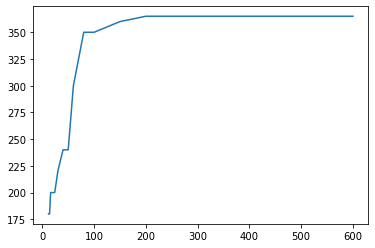

In [125]:
plt.plot(newdf["X1"],y1)

In [135]:
def polyplotter(X,y,k):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)
    pf = PolynomialFeatures(degree=k)
    X_train_poly = pf.fit_transform(X_train)
    X_test_poly = pf.fit_transform(X_test)
    LinRegPoly = LinearRegression()
    LinRegPoly.fit(X_train_poly,y_train)
    y_test_pred_poly = LinRegPoly.predict(X_test_poly)
    y_train_pred_poly = LinRegPoly.predict(X_train_poly)
    R2_train_score = metrics.r2_score(y_train,y_train_pred_poly)
    R2_test_score = metrics.r2_score(y_test,y_test_pred_poly)
    return R2_train_score,R2_test_score;



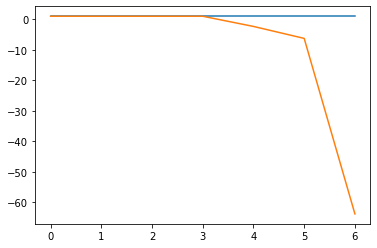

In [137]:
train = []
test = []
for i in range(1,8):
    R2_train,R2_test = polyplotter(X1,y1,i)
    train.append(R2_train)
    test.append(R2_test)

plt.plot(train,label="Training")
plt.plot(test,label="Testing")